<a href="https://colab.research.google.com/github/OrnellaTech/LFGN/blob/main/Loi_Faible_des_Grands_Nombres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-35b68b042f34>:51: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


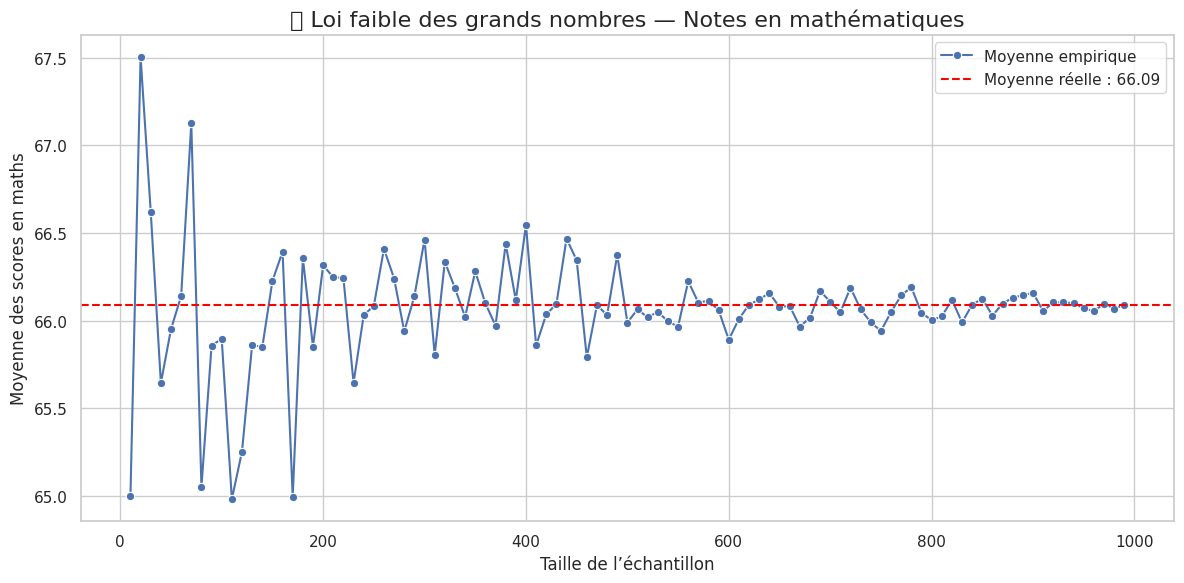

In [ ]:
# 📚 Importation des bibliothèques nécessaires
import pandas as pd                    # Pour lire et manipuler les données (CSV, tableaux…)
import numpy as np                     # Pour les calculs numériques (moyennes, tirages aléatoires…)
import matplotlib.pyplot as plt        # Pour tracer les graphiques
import seaborn as sns                  # Pour rendre les graphiques plus jolis

#  On applique un style visuel agréable aux graphiques
sns.set(style="whitegrid")

#  Chargement du fichier CSV contenant les données des étudiants
df = pd.read_csv('StudentsPerformance.csv')

#  On extrait uniquement la colonne des notes en mathématiques
scores = df['math score'].values

#  Définition des tailles d’échantillons : on va tester pour 10, 20, 30, ..., jusqu’à la taille totale
taille_echantillons = range(10, len(scores), 10)

#  Liste vide qui va stocker les moyennes calculées pour chaque taille d’échantillon
moyennes = []

#  Pour chaque taille d’échantillon :
for n in taille_echantillons:
    # On répète 10 fois un tirage aléatoire d'échantillon de taille n, pour plus de stabilité
    sous_moyennes = [np.mean(np.random.choice(scores, size=n, replace=False)) for _ in range(10)]

    # On fait la moyenne des 10 moyennes obtenues pour un échantillon de taille n
    moyennes.append(np.mean(sous_moyennes))

# 🎯 On calcule la moyenne "réelle" de toutes les notes en mathématiques (la vraie valeur vers laquelle on tend)
true_mean = np.mean(scores)

# 📊 Création du graphique
plt.figure(figsize=(12, 6))  # Taille du graphique (largeur x hauteur)

# Tracé de la courbe des moyennes empiriques obtenues
sns.lineplot(x=taille_echantillons, y=moyennes, marker="o", label="Moyenne empirique")

# Ligne horizontale rouge représentant la vraie moyenne (espérance)
plt.axhline(y=true_mean, color='red', linestyle='--', label=f"Moyenne réelle : {true_mean:.2f}")

# ✍ Ajout du titre et des étiquettes
plt.title("📚 Loi faible des grands nombres — Notes en mathématiques", fontsize=16)
plt.xlabel("Taille de l’échantillon", fontsize=12)
plt.ylabel("Moyenne des scores en maths", fontsize=12)

# 📎 Affichage de la légende
plt.legend()

# 📐 Ajustement automatique pour ne pas que les textes débordent
plt.tight_layout()

# 🎉 Affichage du graphique final
plt.show()
